1. Первым делом надо определить ROI (Участок интереса) нужной информации. Для этого использовалась функция selectROI() библиотеки OpenCV. Функция позволяет вручную выделить участки на картинке и на выходе дает x, y, w, h координаты участка. См. Изображение 1.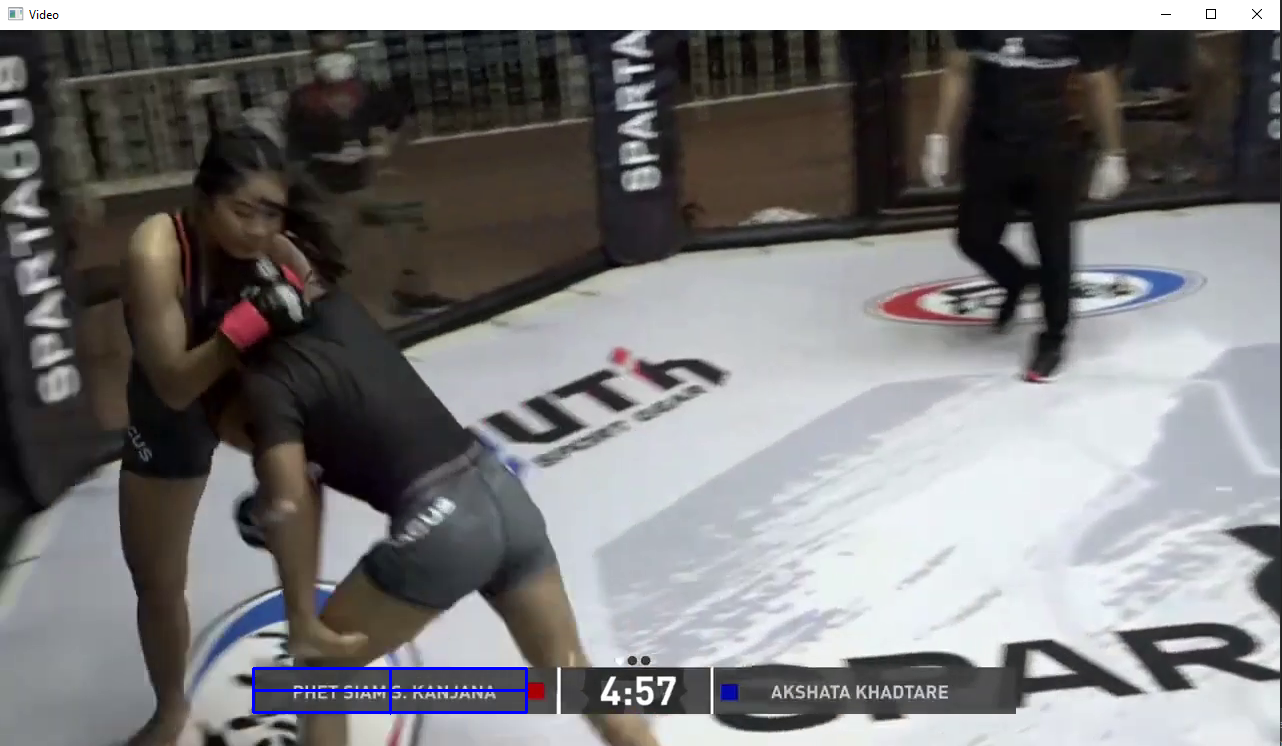


                                                                        Изображение 1 

> На изображении 1, имя первого бойца (слева) вручную выделяется с помощью функции SelectROI(). На выходе функция дает координаты участка left_name = 256, 639, 268, 40. Координаты позволят в будущем анализировать участок на предмет текста.

> Данный метод используется для всех областей интереса нужной информации. Данным методом также были получены координаты имени второго бойца, оставшегося времени, цвета первого бойца, цвета второго бойца, и трех ячеек обозначающих текущий раунд.

2. Через функцию read() программа считывает каждый кадр видео в процессе итерации через цикл. Для этого нужно перед циклом создать объект VideoCapture() с помощью библиотеки OpenCV. 

3. Так как нам уже известны координаты нужных нам участков изображения, мы можем вызывать функцию image_to_string() библиотеки pytesseract с нужным нам участком на входе. Функция будет возвращать текст, который присутствует на участке изображения. 

> Этим способом мы можем получить имя первого бойца, имя второго бойца, и оставшееся время до конца раунда.

> Для этого нам нужно будет в каждой итерации, то есть для каждого кадра, вызывать функцию image_to_string() три раза, но с разными координатами участков. Для имени первого бойца (слева), для имени второго бойца (справа), и для оставшегося времени.

> Так как программа определяла текст времени не идеально, для увеличения точности, перед использованием функции image_to_string() участок с текстом времени был увеличен и конвертирован в grayscale.


> **Примечание:** для работы с Pytesseract на Windows мне нужно было установить pytesseract в environment, а также указать путь к запускаемому файлу Tesseract в программе. 
Папка с проектом также содержит папку Tesseract для Windows 64bit. В файле main.py указан путь к запускаемому файлу: pytesseract.pytesseract.tesseract_cmd = 'Tesseract/tesseract.exe'. Source code: https://github.com/tesseract-ocr/tesseract. Версия для Windows была скачена с https://github.com/UB-Mannheim/tesseract/wiki. 

> Для работы в Google Colab или Ubuntu можно прописать строку *sudo apt install tesseract-ocr* 

> Строка pytesseract.pytesseract.tesseract_cmd = 'Tesseract/tesseract.exe' в main.py, в этом случае, не требуется.

4. Остается определить цвета бойцов и текущий раунд. Тут функции для текста не подойдут, и нужно будет работать с цветом. 

> Так как цвет бойца может быть либо синим либо красным, нужно будет определить один из этих цветов. Нам уже известны координаты участков изображения где указан цвет того или иного бойца. См. изображение 2.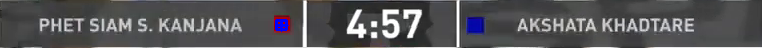

                                                        Изображение 2

> Чтобы определить цвет, нужно будет заранее указать интервал значений для красного и синего цвета: 
> 
> lower_red = (0,50,50)
upper_red = (10,255,255)
lower_blue = (110,50,50)
upper_blue = (130,255,255)

> Так как OpenCV выдает кадр в BGR формате, нужно конвертировать его в HSV формат. HSV формат более удобен для определения цвета так как преобразование изображения в цветовое пространство HSV может быть более полезно для определения цвета, поскольку оно отделяет яркость (значение) цвета от его оттенка и насыщенности.

> Затем код создает две маски для диапазона цветов, соответствующих красному и синему.

> Назначение масок в этом коде — идентифицировать пиксели в интересующей области (ROI), которые попадают в определенный диапазон цветов, в частности красного и синего.

> Код создает две маски, одну для красного и одну для синего, используя функцию **cv2.inRange()**. Эта функция создает бинарное изображение, в котором пикселям, попадающим в указанный диапазон цветов, присваивается значение 1 (белый), а всем остальным пикселям присваивается значение 0 (черный).

> После этого код использует функцию **cv2.findContours()** для поиска контуров (границ) объектов в масках. Контуры хранятся в переменных contours_red и contours_blue

> Целью контуров является определение границ красных и синих объектов на изображении, чтобы код мог определить, присутствуют ли какие-либо объекты этих цветов в области интереса (ROI).

> Наконец, код проверяет, были ли найдены какие-либо контуры, и сохраняет цвет найденных контуров.

5. В случае с определением текущего раунда, процесс такой же, но с интервалами для белых и черных цветов (возможные цвета ячеек). Для удобства эта часть кода была написана отдельной функцией **detect_round()**. 

> У нас есть 3 области интереса для 3-х ячеек указывающих текущий раунд. Сперва, определяем цвет 3-ей ячейки. Если цвет белый, то функция возвращает round = 3, если черный, то определяем цвет второй ячейки. Если цвет второй ячейки белый, то функция возвращает round = 2, если черный, то возвращает round = 1.

6. Все данные записываются в файл  file_res.csv. Если id = 0, то есть мы дошли до кадра с всплывающим окном, то создаем файл через with open(filename, 'w', newline='') as csvfile: и добавляем поля: frame_number,	First_fighter	Second_fighter,	First_fighter_color,	Second_fighter_color,	time_left,	round. Также добавляем первую строку данных. 

> Далее по каждому кадру в итеративном порядке добавляем в csv файл данные: номер кадра, имя первого бойца, имя второго бойца, цвет первого бойца, цвет второго бойца, оставшееся время до конца раунда, и номер текущего раунда.

> **Примечание:** CSV file создавался в случае если модель в первый раз находила в соответствующих областях текст с именами и цвета (появляется всплывающее окно). В кадрах, где модель не находила оба имени и оба цвета (в перерывах между раундами), данные записаны не были. 

Ниже предоставлен анализ результатов **полного** видео. В папке с проектом предоставлены **отрезок** этого видео и соответственно результаты для отрезка.

In [118]:
import pandas as pd

In [99]:
res = pd.read_csv("file_res.csv", encoding= 'unicode_escape') 
## Cледует уточнить тип расшифровки, иначе выдает ошибку.

In [100]:
res.head(10)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
0,2176,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
1,2177,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
2,2178,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
3,2179,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
4,2180,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
5,2181,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
6,2182,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
7,2183,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
8,2184,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1
9,2185,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,4:54\n,1


Как и ожидалось, CSV файл начинается с данных полученных с кадра, когда появляется всплывающее окно (1 раунд, 4:54 до конца раунда.)

In [101]:
res.tail(10)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
20760,28024,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20761,28025,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20762,28026,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20763,28027,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20764,28028,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20765,28029,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20766,28030,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:19\n,3
20767,28031,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:19\n,3
20768,32177,<\n,AN @ *\n,Blue,Red,NaN,3
20769,32890,4\n,tit\n,Red,Blue,NaN,1


Последние два ряда были ошибочно добавлены. Очевидно, программа ошибочно увидела текст и цвета в нужных областях. Для чистоты данных удаляем эти ряды.

In [102]:
# get the number of rows in the DataFrame
num_rows = res.shape[0]

# delete the last two rows
res = res.drop(res.index[num_rows-2:num_rows])

res.tail(10)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
20758,28022,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20759,28023,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20760,28024,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20761,28025,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20762,28026,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20763,28027,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20764,28028,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20765,28029,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:20\n,3
20766,28030,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:19\n,3
20767,28031,WANDERSON SANTOS\n,KAYQUE DE PAULA\n,Red,Blue,0:19\n,3


Также, сразу заметно присутствие знака '\n' в конце значений столбов имен и времени. Вероятно, Tesseract ошибочно видел новый ряд. Знак присутствует в каждом ряду. Знак нужно будет удалить.

In [103]:
res['First_fighter'] = res['First_fighter'].str[:-1]
res['Second_fighter'] = res['Second_fighter'].str[:-1]
res['time_left'] = res['time_left'].str[:-1]

In [104]:
res.head(10)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
0,2176,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
1,2177,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
2,2178,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
3,2179,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
4,2180,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
5,2181,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
6,2182,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
7,2183,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
8,2184,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
9,2185,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1


In [105]:
res.tail(10)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
20758,28022,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20759,28023,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20760,28024,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20761,28025,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20762,28026,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20763,28027,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20764,28028,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20765,28029,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:20,3
20766,28030,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:19,3
20767,28031,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:19,3


Как видим, последнее данное о времени: раунд 3, 0:19. Матч не закончился за 19 секунд до конца 3 раунда, но всплывающее окно исчезло в это время.

In [106]:
all_rounds = res['round'].unique()

print(all_rounds)

[1 2 3]


Выше указаны все числа раундов имеющихся в файле. Можно сделать вывод, что действительно имели место быть все 3 раунда.

In [107]:
round_1_rows = res.loc[res['round'] == 1]
round_2_rows = res.loc[res['round'] == 2]
round_3_rows = res.loc[res['round'] == 3]

In [108]:
round_1_rows.head(4)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
0,2176,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
1,2177,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
2,2178,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1
3,2179,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,1


Выше показаны первые кадры первого раунда.

In [109]:
round_1_rows.tail(4)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
7106,9282,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:10,1
7107,9283,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:10,1
7108,9284,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:10,1
7109,9285,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:10,1


Как и подтверждается при просмотре видео, всплывающее окно в первом раунде исчезло за 10 секунд до конца раунда.

In [111]:
round_2_rows.head(10)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
7110,11704,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,454,2
7111,11705,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,454,2
7112,11706,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,454,2
7113,11707,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,454,2
7114,11708,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,2
7115,11709,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,2
7116,11710,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,2
7117,11711,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,2
7118,11712,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:54,2
7119,11713,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,454,2


В таблице выше, затем уже идут данные со 2 раунда.

In [112]:
round_2_rows.tail(5)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
14098,18692,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:15,2
14099,18693,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:15,2
14100,18694,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:15,2
14101,18695,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:15,2
14102,18696,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,0:15,2


Как и подтверждается при просмотре видео, всплывающее окно во втором раунде исчезло за 15 секунд до конца раунда.

In [113]:
round_3_rows.head(5)

,frame_number,First_fighter,Second_fighter,First_fighter_color,Second_fighter_color,time_left,round
14103,21367,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:46,3
14104,21368,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:46,3
14105,21369,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:46,3
14106,21370,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:46,3
14107,21371,WANDERSON SANTOS,KAYQUE DE PAULA,Red,Blue,4:46,3


Следующим рядом уже идут данные для 3 раунда. Очевидно, определение всех 3 раундов и порядок данных точны.

In [ ]:
all_rounds = res['First_fighter'].unique()

# print the unique values
print(all_rounds)

['WANDERSON SANTOS']


In [ ]:
all_rounds = res['Second_fighter'].unique()

# print the unique values
print(all_rounds)

['KAYQUE DE PAULA']


Так как присутствует только одно значение (верное) для имени каждого из бойцов, можно сделать вывод, что программа выдавала имена бойцов с постоянной точностью.

In [ ]:
all_rounds = res['First_fighter_color'].unique()

# print the unique values
print(all_rounds)

['Red']


In [ ]:
all_rounds = res['Second_fighter_color'].unique()

# print the unique values
print(all_rounds)

['Blue']


Тот же самый вывод о цветах участников.

In [ ]:
all_rounds = res['time_left'].unique()
print(all_rounds)

['4:54' '4:53' '4:52' '4:51' '4:50' '4:49' '4:49.' '\x934:49' '\x93449'
 '\x934:48' '4:48' '4:47' '4:46' '4:45' '4:44' '\x93444' '\x934:44'
 '4:44.' 'Ad' nan '4:43' '4:42' '4:41' '4:40' '4:39' '4:38' '4:37' '4:36'
 '4:36.' '4:35' '435' '4:34' '4:33' '4:32' '\x934332' '4:31' '4:30' '4:29'
 '4:28' '4:27' '4:26' '4:25' '4:24' '4:23' '4:22' '4:21' '4:20' '4:19'
 '4:18' '4:17' '4:16' '4:15' '4:14' '4:13' '4:12' '4:11' '4:10' '4:09'
 '4:08' '4:07' '4:06' '4:05' '4:04' '4:03' '4:02' '4:01' '4:00' '3:59'
 '3:58' '3:57' '3:56' '3:55' '3355' '3:54' '3:53' '3352' '3:51' '3351'
 '3:50' '3:49' '3:48' '3:47' '3:46' '3:45' '3:44' '3:43' '3:42' '3:41'
 '3:40' '3:39' '3:38' '3:37' '3:36' '3:35' '3:34' '3:33' '3:32' '3:31'
 '3:30' '3:29' '3:28' '3:27' '3:26' '3:25' '3:24' '3:23' '3:22' '3:22.'
 '3:21' '3:21.' '3:20' '3:19' '319' '3:18' '318' '38' '3:17' '3:16' '3:15'
 '3:14' '3:13' '3:12' '3:11' '3:10' '3:09' '3:08' '3:07' '3:06' '3:05'
 '3:04' '3:03' '3:02' '3:01' '3:00' '2:59' '2:58' '\x93257' '2:56' 

В случае с выводом оставшегося времени, программа не дала идеальной точности. Как видим, некоторые кадры выдавали несвязные значения. Тем не менее, почти все значения содержат в составе верный текст.

In [ ]:
import re

res['time_left'] = res['time_left'].astype(str)

time_pattern = "^[0-9]{1}:[0-9]{2}$"

mask = res['time_left'].str.match(time_pattern)

count = len(res[~mask])

Можно посчитать соотношение точных выдач времени. Программа не путала цифры, но могла выдать текст не соответствующий формату [цифра: цифра цифра]. Поэтому, посчитав процент значений попадавших в нужный формат, получим точность вывода оставшегося времени.

In [84]:
print("Точность определения оставшегося времени:", (len(res) - count)/len(res) * 100, '%')

Точность определения оставшегося времени: 76.63938372652865 %


Как было упомянуто ранее, для улучшения точности был произведен препроцессинг области интереса для времени. Возможно, альтернативные методы препроцессинга или использование другой модели OCR увеличат точность.

***Благодарю вас за рассмотрение моей заявки, буду ждать обратной связи!***